# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [M Wildan Nurohman]
- **Email:** [wildangtg15@gmail.com]
- **ID Dicoding:** [wildannurohman]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Apakah ada periode atau bulan tertentu dalam setahun di mana kualitas udara lebih buruk?
- Pertanyaan 2 : Bagaimana hubungan antara kecepatan angin (WSPM) dan tingkat PM2.5 pada hari kerja dan akhir pekan di stasiun Wanliu dalam tahun 2016?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
airq1_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
airq1_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
1,2,2013,3,1,1,6.0,29.0,5.0,9.0,300.0,80.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Tiantan
2,3,2013,3,1,2,6.0,6.0,4.0,12.0,300.0,75.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Tiantan
3,4,2013,3,1,3,6.0,6.0,4.0,12.0,300.0,74.0,-1.4,1026.2,-25.5,0.0,N,4.9,Tiantan
4,5,2013,3,1,4,5.0,5.0,7.0,15.0,400.0,70.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Tiantan


In [3]:
airq2_df = pd.read_csv("https://raw.githubusercontent.com/marceloreis/HTI/refs/heads/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
airq2_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


**Insight: **
- terlihat ada beberapa value yang berisi NaN yang berarti nilai tidak terdefinisi/tidak sesuai dengan tipe data.
- value yg berisi NaN tersebut harus diselesaikan ditahap assesing dan cleaning data, agar pada saat memproses data, proses tidak terganggu

### Assessing Data

mencetak informasi berupa nama-nama kolom, jumlah data di setiap kolom, dan tipe data dari setiap dataset dengan method airq1_df.info()

In [7]:
airq1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [5]:
airq2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Memeriksa missing value pada data pertama

In [6]:
airq1_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,677
PM10,597
SO2,1118
NO2,744
CO,1126


Memeriksa missing value pada data kedua

In [8]:
airq2_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,382
PM10,284
SO2,575
NO2,1070
CO,1812


Memeriksa duplikasi pada data pertama

In [9]:
print("Jumlah duplikasi: ", airq1_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa duplikasi pada data kedua

In [10]:
print("Jumlah duplikasi: ", airq2_df.duplicated().sum())

Jumlah duplikasi:  0


Memeriksa outlier pada data pertama

In [11]:
airq1_df_numeric = airq1_df.select_dtypes(include=['float64', 'int64'])

Q1 = airq1_df_numeric.quantile(0.25)
Q3 = airq1_df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((airq1_df_numeric < (Q1 - 1.5 * IQR)) | (airq1_df_numeric > (Q3 + 1.5 * IQR)))

outliers_data = airq1_df_numeric[outliers.any(axis=1)]

outliers_count_per_column = outliers.sum()

total_outliers = outliers_count_per_column.sum()

if total_outliers > 0:
    print(f"Outliers ditemukan di {len(outliers_data)} baris.")
    print("Jumlah outlier per kolom:")
    print(outliers_count_per_column)
    print(f"\nTotal outlier seluruh kolom: {total_outliers}")
else:
    print("Outlier tidak ditemukan.")

Outliers ditemukan di 9502 baris.
Jumlah outlier per kolom:
No          0
year        0
month       0
day         0
hour        0
PM2.5    1592
PM10     1324
SO2      3135
NO2       658
CO       2160
O3       1571
TEMP        0
PRES        0
DEWP        0
RAIN     1371
WSPM     1609
dtype: int64

Total outlier seluruh kolom: 13420


Memeriksa outlier data kedua

In [12]:
airq2_df_numeric = airq2_df.select_dtypes(include=['float64', 'int64'])

Q1 = airq2_df_numeric.quantile(0.25)
Q3 = airq2_df_numeric.quantile(0.75)
IQR = Q3 - Q1

outliers = ((airq2_df_numeric < (Q1 - 1.5 * IQR)) | (airq2_df_numeric > (Q3 + 1.5 * IQR)))

outliers_data = airq2_df_numeric[outliers.any(axis=1)]

outliers_count_per_column = outliers.sum()

total_outliers = outliers_count_per_column.sum()

if total_outliers > 0:
    print(f"Outliers ditemukan di {len(outliers_data)} baris.")
    print("Jumlah outlier per kolom:")
    print(outliers_count_per_column)
    print(f"\nTotal outlier seluruh kolom: {total_outliers}")
else:
    print("Outlier tidak ditemukan.")

Outliers ditemukan di 9452 baris.
Jumlah outlier per kolom:
No          0
year        0
month       0
day         0
hour        0
PM2.5    1566
PM10     1221
SO2      2870
NO2       490
CO       2687
O3       1386
TEMP        0
PRES        0
DEWP        0
RAIN     1436
WSPM     1555
dtype: int64

Total outlier seluruh kolom: 13211


**Insight:**
- Missing value : semua data frame memiliki missing value dengan jumlah yg berbeda
- Duplicate : semua data frame tidak memiliki duplikasi
- Outliers : semua data frame memiliki outliers dengan jumlah yg berbeda

### Cleaning Data

Menyelesaikan Missing Value

In [13]:
# menggunakan metode interpolate
airq1_df.interpolate(method='linear', inplace=True)
print(airq1_df.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd         78
WSPM        0
station     0
dtype: int64


<ipython-input-13-7628ef12decc>:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  airq1_df.interpolate(method='linear', inplace=True)


In [14]:
#cek missing value
print(airq2_df.isnull().sum())
# menggunakan metode imputation
airq2_df.apply(lambda x: x.fillna(x.mean()) if x.dtype in ['int64', 'float64'] else x.fillna(x.mode()[0]))

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.000000,28.000000,400.000000,52.000000,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.000000,28.000000,400.000000,50.000000,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,18.376481,19.000000,400.000000,55.000000,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.000000,14.000000,1319.353513,48.873614,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.000000,65.258789,300.000000,54.000000,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.000000,20.000000,300.000000,81.000000,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu
35060,35061,2017,2,28,20,15.0,43.0,6.000000,55.000000,500.000000,45.000000,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu
35061,35062,2017,2,28,21,13.0,35.0,7.000000,48.000000,500.000000,48.000000,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu
35062,35063,2017,2,28,22,12.0,31.0,5.000000,47.000000,500.000000,50.000000,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu


Menyelesaikan outlier

In [15]:
def replace_outliers(df):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        maximum = Q3 + (1.5 * IQR)
        minimum = Q1 - (1.5 * IQR)

        df[column] = df[column].mask(df[column] > maximum, maximum)
        df[column] = df[column].mask(df[column] < minimum, minimum)

replace_outliers(airq1_df)
replace_outliers(airq2_df)


print(f"DataFrame airq1_df:\n{airq1_df.head()}\n")
print(f"DataFrame airq2_df:\n{airq2_df.head()}\n")

DataFrame airq1_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   4.5  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   4.5  Tiantan  
3  1026.2 -25.5   0.0    N   4.5  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  

DataFrame airq2_df:
   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  201

**Insight:**
- Mengisi missing value dengan metode imputation, yaitu mean, med, mode
- Membersihkan missing value dengan metode interpolasi
- Kualitas udara di Wanliu cenderung lebih buruk dibandingkan Tiantan, terlihat dari konsentrasi PM2.5, PM10, dan NO2 yang lebih tinggi.

## Exploratory Data Analysis (EDA)

### Explore ...

menggabungkan kedua data frame tersebut

In [16]:
df_all = pd.concat([airq1_df, airq2_df])

mengubah tipe data untuk kolom ; year, month, day, hour, ke dalam tipe data DATETIME

In [17]:
df_all['date_time'] = pd.to_datetime(df_all[['year', 'month', 'day', 'hour']])

In [18]:
print(df_all.describe())

                 No          year         month           day          hour  \
count  70128.000000  70128.000000  70128.000000  70128.000000  70128.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   
std    10122.177085      1.177205      3.448728      8.800155      6.922236   

              PM2.5          PM10           SO2           NO2            CO  \
count  69746.000000  69844.000000  69553.000000  69058.000000  68316.000000   
mean      79.026436    105.092318     14.014059     58.785249   1205.020883   
min        2.000000      2.000000      0.285600    

In [19]:
# membuat dataframe baru yg berisi semua data dari dataframe yg telah digabung
all_cities_df_2013_2017 = df_all[df_all['year'].between(2013, 2017)]

In [20]:
# menginisialisasi pollutans
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

In [21]:
# menghitung rata-rata nilai polutan untuk setiap kombinasi tahun dan bulan
monthly_avg = all_cities_df_2013_2017.groupby(['year', 'month'])[pollutants].mean().reset_index()

In [22]:
# menambahkan kolom baru yang merepresentasikan total polutan di setiap kombinasi tahun dan bulan
monthly_avg['Total_Pollutants'] = monthly_avg['PM2.5'] + monthly_avg['PM10'] + monthly_avg['SO2'] + monthly_avg['NO2'] + monthly_avg['CO'] + monthly_avg['O3']

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Apakah ada periode atau bulan tertentu dalam setahun di mana kualitas udara lebih buruk?

In [23]:
for year in range(2013, 2017+1):
    print(f"Bulan dengan kualitas udara terburuk di tahun {year} (berdasarkan Total Polutan):")
    print(monthly_avg[monthly_avg['year'] == year][['month', 'Total_Pollutants']].sort_values(by='Total_Pollutants', ascending=False).head())


Bulan dengan kualitas udara terburuk di tahun 2013 (berdasarkan Total Polutan):
   month  Total_Pollutants
9     12       1950.259980
3      6       1900.811959
0      3       1887.315732
8     11       1742.832789
7     10       1653.397164
Bulan dengan kualitas udara terburuk di tahun 2014 (berdasarkan Total Polutan):
    month  Total_Pollutants
11      2       2431.805494
10      1       2274.280458
20     11       1891.881595
12      3       1799.364467
19     10       1719.099310
Bulan dengan kualitas udara terburuk di tahun 2015 (berdasarkan Total Polutan):
    month  Total_Pollutants
33     12       2404.057900
22      1       2093.634102
32     11       2016.107932
23      2       1769.782900
24      3       1563.540255
Bulan dengan kualitas udara terburuk di tahun 2016 (berdasarkan Total Polutan):
    month  Total_Pollutants
45     12       2437.265910
44     11       2084.480362
34      1       1883.966371
36      3       1525.049816
43     10       1437.740831
Bulan dengan k

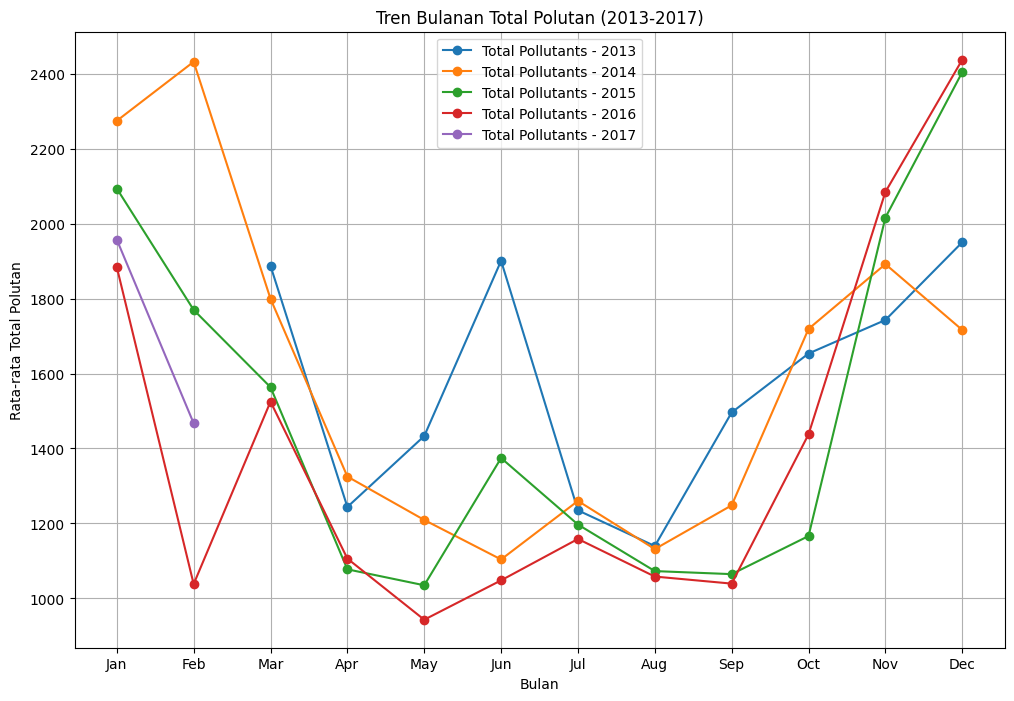

In [24]:
plt.figure(figsize=(12, 8))
for year in range(2013, 2017 + 1):
    data_per_year = monthly_avg[monthly_avg['year'] == year]
    plt.plot(data_per_year['month'], data_per_year['Total_Pollutants'], marker='o', label=f'Total Pollutants - {year}')

plt.title('Tren Bulanan Total Polutan (2013-2017)')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Total Polutan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Menampilkan label bulan
plt.legend()
plt.grid(True)
plt.show()

### Pertanyaan 2: Bagaimana hubungan antara kecepatan angin (WSPM) dan tingkat PM2.5 pada hari kerja dan akhir pekan di stasiun Wanliu dalam tahun 2016?

<ipython-input-25-25158ac5984e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['dayofweek'] = pd.to_datetime(df_filtered[['year', 'month', 'day']]).dt.dayofweek
<ipython-input-25-25158ac5984e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_type'] = df_filtered['dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')


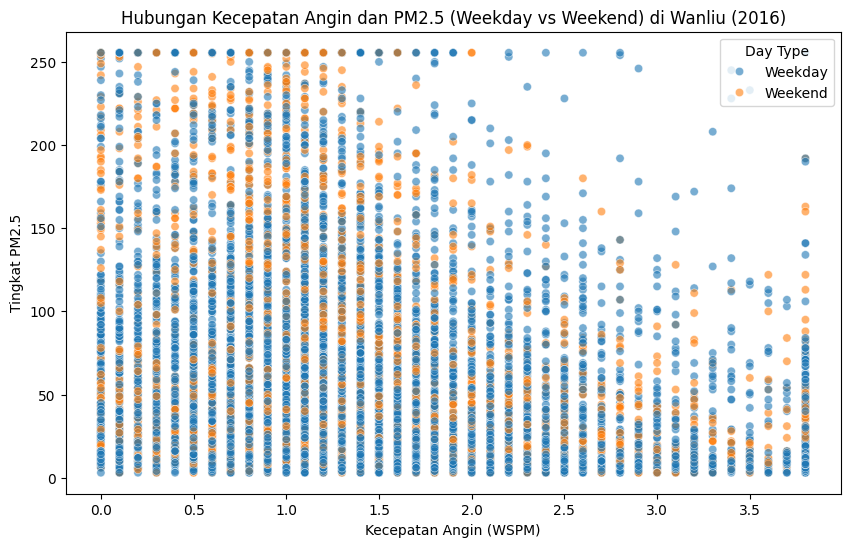

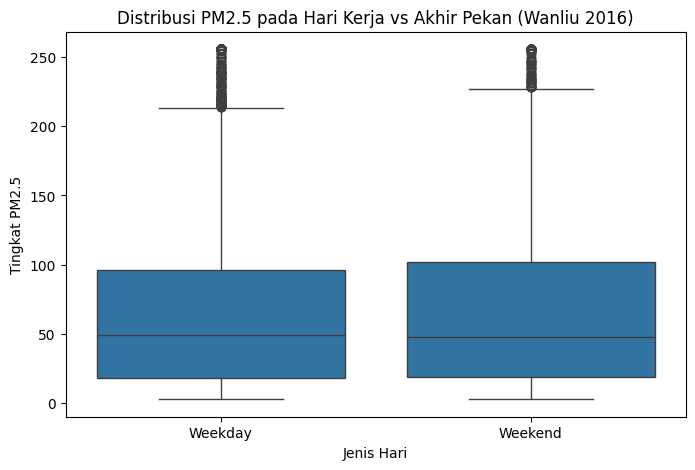

In [25]:
# filter data untuk tahun 2016 di stasiun tiantan
df_filtered = airq2_df[(airq2_df['year'] == 2016) & (airq2_df['station'] == 'Wanliu')]

# Tambahkan kolom hari kerja atau akhir pekan
df_filtered['dayofweek'] = pd.to_datetime(df_filtered[['year', 'month', 'day']]).dt.dayofweek
df_filtered['day_type'] = df_filtered['dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# scatter plot hubungan antara WSPM dan PM2.5
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='WSPM', y='PM2.5', hue='day_type', alpha=0.6)
plt.xlabel("Kecepatan Angin (WSPM)")
plt.ylabel("Tingkat PM2.5")
plt.title("Hubungan Kecepatan Angin dan PM2.5 (Weekday vs Weekend) di Wanliu (2016)")
plt.legend(title="Day Type")
plt.show()

# box plot untuk membandingkan distribusi PM2.5 pada hari kerja dan akhir pekan
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_filtered, x='day_type', y='PM2.5')
plt.xlabel("Jenis Hari")
plt.ylabel("Tingkat PM2.5")
plt.title("Distribusi PM2.5 pada Hari Kerja vs Akhir Pekan (Wanliu 2016)")
plt.show()


**Insight:**
- line chart : tingkat polutan cenderung tinggi selama bulan januari hingga maret dan kembali meningkat pada oktober hingga desember.
- scatter plot : titik-titik lebih tersebar pada kecepatan angin rendah (0-2 m/s), di mana konsentrasi PM2.5 lebih bervariasi, bahkan mencapai angka yang sangat tinggi (>700).
- box plot : kedua kategori memiliki banyak outlier di atas 400, yang menunjukkan beberapa hari dengan polusi udara ekstrem.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Semua tahun menunjukkan peningkatan signifikan dalam tingkat polusi mulai oktober hingga desember, kemungkinan penyebabnya adalah peningkatan penggunaan bahan bakar untuk pemanasan, peningkatan aktivitas industri sebelum akhir tahun, dan stabilitas atmosfer yang lebih tinggi yang menyebabkan polutan terjebak lebih lama.



- Conclution pertanyaan 2 : polusi pada hari kerja vs akhir pekan: tidak ada perbedaan signifikan dalam tingkat PM2.5 antara hari kerja dan akhir pekan, ini bisa menunjukkan bahwa sumber polusi utama tidak hanya berasal dari aktivitas industri atau transportasi tetapi juga dari faktor lain seperti kondisi cuaca atau sumber polusi tetap.

In [26]:
airq2_df.to_csv("airquality_new.csv", index=False)